# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('tengiri.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Tengiri
Produksi Hasil Tangkap Laut,
2017-01-01,3.56
2017-02-01,3.75
2017-03-01,3.62
2017-04-01,3.95
2017-05-01,3.67
2017-06-01,3.88
2017-07-01,3.63
2017-08-01,3.55
2017-09-01,3.61


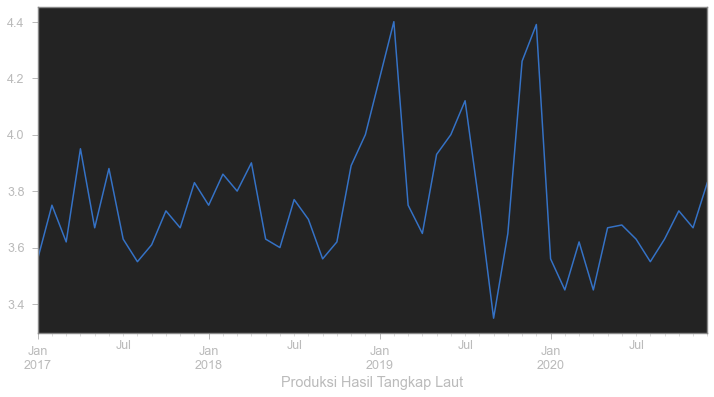

In [3]:
data['Tengiri'].plot(figsize=(12,6));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Tengiri'])

Augmented Dickey-Fuller Test:
ADF test statistic      -5.101483
p-value                  0.000014
# lags used              1.000000
# observations          46.000000
critical value (1%)     -3.581258
critical value (5%)     -2.926785
critical value (10%)    -2.601541

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Data is STATIONARY!

## 5. Check Seasonality Data

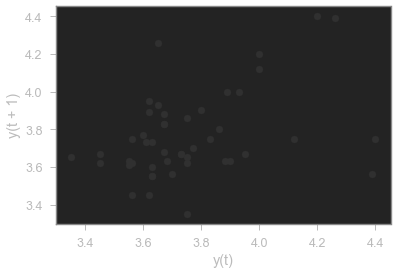

In [5]:
# With lag plot
lag_plot(data['Tengiri']);

tidak dapat diketahui trend dan seasonality

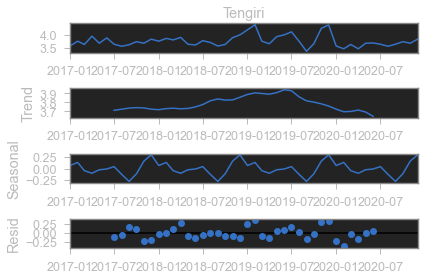

In [6]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Tengiri'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY, terlihat range seasonality di (-0.25, 0.25) dan trend di (3.7, 3.9). Jika seasonality dimasukkan ke trend itu akan mengubah plot karena seasonalitynya cukup besar untuk trend, maka terdapat seasonality pada data. Gunakan SARIMA MODEL

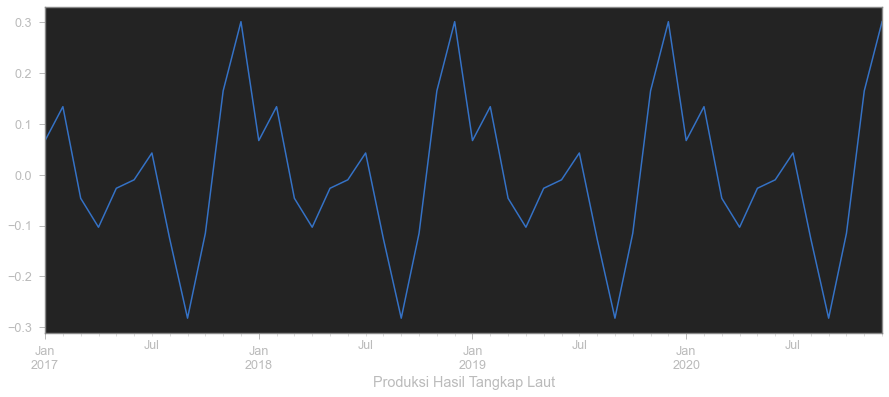

In [7]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

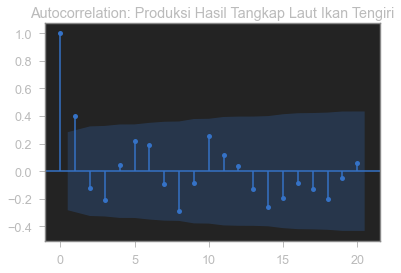

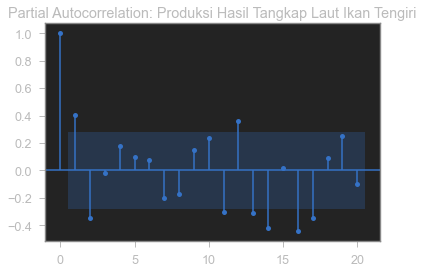

In [8]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Ikan Tengiri'
plot_acf(data['Tengiri'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Ikan Tengiri'
plot_pacf(data['Tengiri'],title=title,lags=lags);

In [9]:
# autoarima
auto_arima(data['Tengiri'], seasonal=True, stationary=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-5.155, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-2.703, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2.971, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-10.895, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=265.519, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-12.505, Time=0.07 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-10.873, Time=0.80 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-8.908, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-10.637, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-10.805, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-8.991, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-8.581, Time=0.79 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 4.954 seconds


ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

Karena (p,q) = (0,0) gabisa maka lihat penentuan berikut:

> <em>If the PACF of a differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive, while the ACF decays more slowly--then consider adding an **AR** terms to the model. Meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. The lag at which the PACF cuts off is indicated number of AR terms.</em><br>

Hal tsb tidak terjadi, maka untuk mencari model alternatif lain dilakukan pencarian manual model mana yg memiliki AIC kedua terkecil. Didapat model (1,0,0)(1,0,0,12)

## 7. Split Data

In [10]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Tengiri'].iloc[:-6]
test_data = data['Tengiri'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01    3.56
 2017-02-01    3.75
 2017-03-01    3.62
 2017-04-01    3.95
 2017-05-01    3.67
 2017-06-01    3.88
 2017-07-01    3.63
 2017-08-01    3.55
 2017-09-01    3.61
 2017-10-01    3.73
 2017-11-01    3.67
 2017-12-01    3.83
 2018-01-01    3.75
 2018-02-01    3.86
 2018-03-01    3.80
 2018-04-01    3.90
 2018-05-01    3.63
 2018-06-01    3.60
 2018-07-01    3.77
 2018-08-01    3.70
 2018-09-01    3.56
 2018-10-01    3.62
 2018-11-01    3.89
 2018-12-01    4.00
 2019-01-01    4.20
 2019-02-01    4.40
 2019-03-01    3.75
 2019-04-01    3.65
 2019-05-01    3.93
 2019-06-01    4.00
 2019-07-01    4.12
 2019-08-01    3.75
 2019-09-01    3.35
 2019-10-01    3.65
 2019-11-01    4.26
 2019-12-01    4.39
 2020-01-01    3.56
 2020-02-01    3.45
 2020-03-01    3.62
 2020-04-01    3.45
 2020-05-01    3.67
 2020-06-01    3.68
 Freq: MS, Name: Tengiri, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    3.63
 2020-08-01    3.55
 2020-09-01    3.63


## 8. SARIMA Train Model

SARIMA(1,0,0)(1,0,0,12)

In [11]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(1,0,0), seasonal_order=(1,0,0,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tengiri   No. Observations:                   42
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -6.053
Date:                            Sun, 12 Dec 2021   AIC                             18.105
Time:                                    20:29:42   BIC                             23.318
Sample:                                01-01-2017   HQIC                            20.016
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9969      0.013     73.974      0.000       0.970       1.023
ar.S.L12       0.0859      0.221      0.389      0.697      -0.347       0.519
sigma2         0.0688      0.013      5.155      0.000       0.043       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.39
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.47   Skew:                            -0.95
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [12]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,0,0)(1,0,0,12) Prediction')
prediction_test

2020-07-01    3.679805
2020-08-01    3.637569
2020-09-01    3.592790
2020-10-01    3.608149
2020-11-01    3.650158
2020-12-01    3.650986
Freq: MS, Name: SARIMA(1,0,0)(1,0,0,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

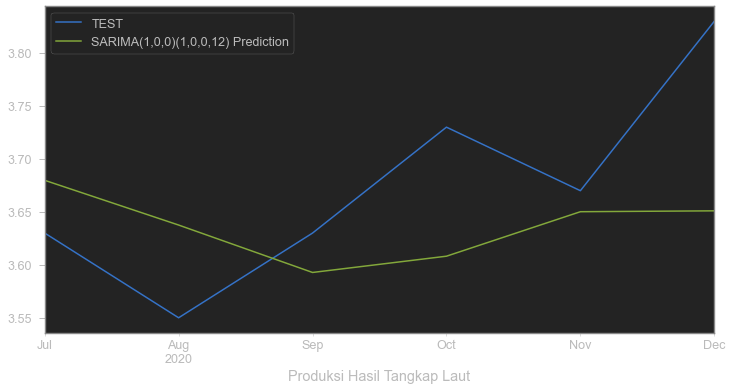

In [13]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

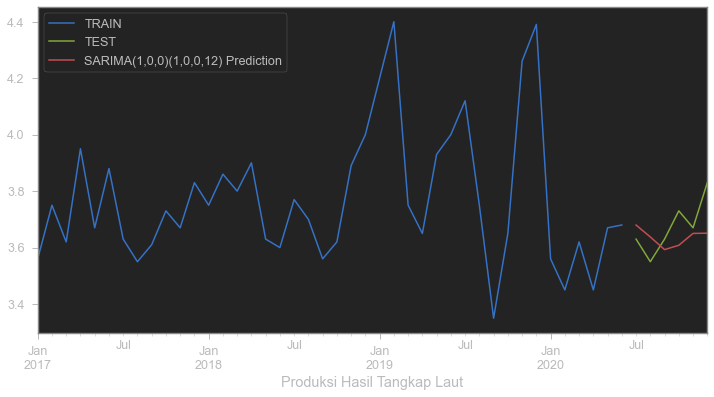

In [14]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

## 10. Evaluate Model

In [15]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'ARIMA(1,1,0) RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'ARIMA(1,1,0) AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 3.771666666666666
Standard Deviation Train data --> 0.23923574113706


ARIMA(1,1,0) RMSE Error: 0.09901244777
ARIMA(1,1,0) AIC: 18.105


Mean Test data --> 3.6733333333333333
Mean Prediction results --> 3.636576149841549


Rata-rata train data itu 3, prediksinya menyimpang 0.09 (RMSE). Standar deviasi (statistik yang mengukur penyebaran kumpulan data relatif terhadap rata-rata) train data itu 0.2, prediksinya menyimpang 0.09 (RMSE). Artinya error tidak menyimpang statistik pada data. Bisa dilihat juga Mean prediction results hampir mirip dgn mean test data. This is good prediction!

Bisa dilihat model kita tidak bisa menggambarkan noise, tetapi sangat bagus dalam memprediksi rata-rata 6 bulan kedepan

## 11. Re-Fit Model to Entire Dataset

In [16]:
model_SARIMA = SARIMAX(data['Tengiri'], order=(1,0,0), seasonal_order=(1,0,0,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tengiri   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -3.828
Date:                            Sun, 12 Dec 2021   AIC                             13.655
Time:                                    20:29:44   BIC                             19.269
Sample:                                01-01-2017   HQIC                            15.777
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9974      0.011     86.810      0.000       0.975       1.020
ar.S.L12       0.0632      0.194      0.327      0.744      -0.316       0.443
sigma2         0.0613      0.010      5.921      0.000       0.041       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                17.58
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               3.08   Skew:                            -1.00
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [17]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,0,0)(1,0,0,12) Forecast')
forecast

2021-01-01    3.768383
2021-02-01    3.752293
2021-03-01    3.753923
2021-04-01    3.734088
2021-05-01    3.738924
2021-06-01    3.730512
Freq: MS, Name: SARIMA(1,0,0)(1,0,0,12) Forecast, dtype: float64

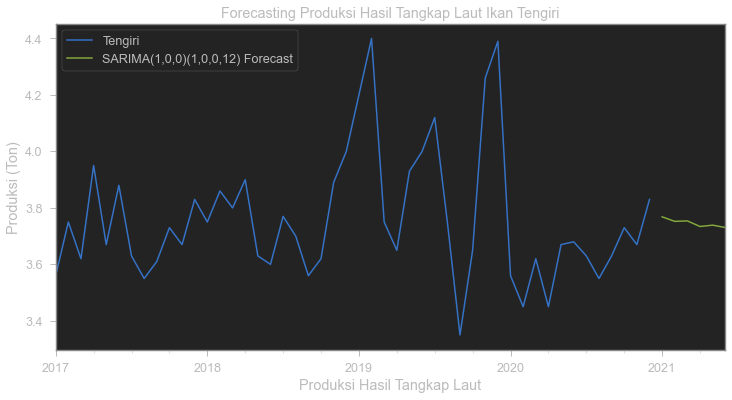

In [18]:
# PLOT
data['Tengiri'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Ikan Tengiri', ylabel='Produksi (Ton)');

Bisa dilihat model kita tidak bisa menggambarkan noise, tetapi sudah terbukti sangat bagus dalam memprediksi rata-rata 6 bulan kedepan

In [19]:
# save model
model_SARIMA.save('model_tengiri.pkl')